In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Ekstraksi Data

In [ ]:
listing = pd.read_csv('DQLab_listings.csv')
neighbourhood = pd.read_csv('DQLab_neighbourhood.csv')
review = pd.read_csv('DQLab_reviews.csv')

Data Preprocessing

Disini saya melakukan pengecekan duplikasi pada table review, dan melakukan drop duplicated. Awalnya saya berkonsultasi dengan mentor DQLab saya yang bernama Mas Misael untuk keanehan lain di table review, setelah keanehan itu sudah terjawab, secara tidak sengaja mas misael menemukan duplikasi. duplikasinya adalah listing_id muncul 2x dihari yang sama, yang seharusnya itu tidak terjadi karena listing_id = property yang tidak masuk akal jika 1 property disewa 2x dihari yang sama.

In [ ]:
review['listing_id'].duplicated()

0        False
1         True
2         True
3         True
4         True
         ...  
49690    False
49691     True
49692     True
49693    False
49694    False
Name: listing_id, Length: 49695, dtype: bool

duplikasi ada pada nomor ke 8 dan 9.

In [ ]:
review[review['date']=='2018-01-01'].sort_values(by='listing_id').tail(10)

,Unnamed: 0,listing_id,date
9948,18315,20016031,2018-01-01
10092,18502,20512779,2018-01-01
10141,18574,20775615,2018-01-01
10642,19137,21415749,2018-01-01
10922,19420,21553387,2018-01-01
11262,19789,21854678,2018-01-01
11534,20071,21888290,2018-01-01
11562,20103,21937326,2018-01-01
11563,20104,21937326,2018-01-01
12166,20717,22310009,2018-01-01


dibawah ini saya melakukan drop duplikat, menggunakan parameters keep = 'first' untuk menjaga baris pertama dari setiap kelompok duplikasi, hanya baris duplikat yang dihapus

In [ ]:
review.drop_duplicates(subset=['listing_id', 'date'], keep='first', inplace=True)

In [ ]:
review[review['date']=='2018-01-01'].sort_values(by='listing_id').tail(10)

,Unnamed: 0,listing_id,date
9585,17857,19101560,2018-01-01
9948,18315,20016031,2018-01-01
10092,18502,20512779,2018-01-01
10141,18574,20775615,2018-01-01
10642,19137,21415749,2018-01-01
10922,19420,21553387,2018-01-01
11262,19789,21854678,2018-01-01
11534,20071,21888290,2018-01-01
11562,20103,21937326,2018-01-01
12166,20717,22310009,2018-01-01


bisa kita lihat dataframe review diatas, penghapusan duplikasi sudah berhasil dan baris pertama tetap aman dan terjaga.

In [ ]:
listing.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


In [ ]:
neighbourhood.head()

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


In [ ]:
review.head()

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


In [ ]:
## cek harga terendah dan tertinggi
print("Harga terendah: ", listing['price'].min())
print("Harga tertinggi: ", listing['price'].max())

Harga terendah:  0
Harga tertinggi:  12494


In [ ]:
#cari tahu nilai yang memiliki 'price' 0
listing[listing['price']==0]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
2802,2802,47790035,lyf Funan Singapore by Ascott | co-living space,385189116,Jay Vincent,Museum,1.292607,103.848885,Hotel room,0,1,0


In [ ]:
## cek jumlah listing id yang memiliki price = 0
cek_0 = listing[listing['price']==0].count()
cek_0

Unnamed: 0          1
id                  1
name                1
host_id             1
host_name           1
neighbourhood       1
latitude            1
longitude           1
room_type           1
price               1
minimum_nights      1
availability_365    1
dtype: int64

In [ ]:
## mencari total jumlah listing_id yang mempunyai price = 0
price_0 = len(listing[listing['price'] == 0])
print("total listing_id yang mempunya price 0: ", price_0)

total listing_id yang mempunya price 0:  1


In [ ]:
## menghapus data yang memiliki harga 0, kemungkinan jika memiliki harga 0 sudah tidak beroperasi lagi
listing = listing.drop(listing.index[(listing['price']==0)], axis = 0)

In [ ]:
## cek apakah masih ada data harga yang 0
listing[listing['price']==0]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365


Join 3 Table

In [ ]:
leftjoin_listing_ngh = pd.merge(listing, neighbourhood, on = "neighbourhood", how = "left")
leftjoin_listing_review = pd.merge(listing, review, left_on = "id", right_on = "listing_id", how = "left")
join3_table = pd.merge(leftjoin_listing_ngh, review, left_on = "id", right_on = "listing_id", how = "left")

Exploratory Data Analyst

In [ ]:
cekngh = join3_table.groupby('neighbourhood')['price'].mean()
cekngh = pd.DataFrame(cekngh)
cekngh

,price
neighbourhood,
Ang Mo Kio,98.956522
Bedok,99.873252
Bishan,136.008929
Bukit Batok,141.297297
Bukit Merah,218.658574
Bukit Panjang,94.428571
Bukit Timah,82.833962
Central Water Catchment,320.000000
Choa Chu Kang,51.909091


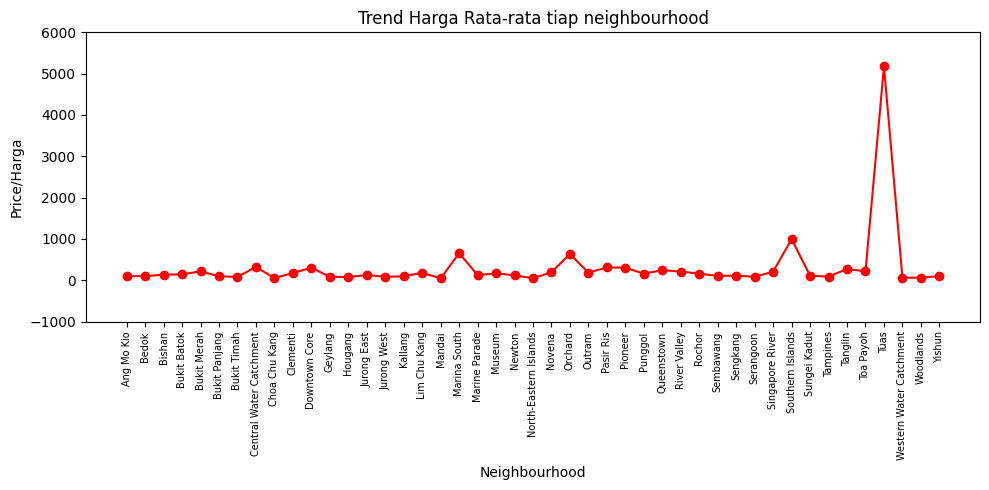

In [ ]:
## buat trend grafik untuk neighbourhood
plt.plot(cekngh, marker = "o", color = "red")
plt.title("Trend Harga Rata-rata tiap neighbourhood", loc="center", fontsize=12, color = "black")
plt.xlabel("Neighbourhood")
plt.ylabel("Price/Harga")
labels, locations = plt.yticks()
plt.yticks(labels)
plt.xticks(rotation = 90, fontsize=7)

#penyesuaian kanvas
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [ ]:
## cek harga tertinggi dan terendah dari rata rata tiap neighbourhood
print('Harga tertinggi dari rata-rata tiap neighbourhood: ')
max_cekngh = cekngh[cekngh['price']==max(cekngh['price'])]
max_cekngh = pd.DataFrame(max_cekngh)
max_cekngh

Harga tertinggi dari rata-rata tiap neighbourhood: 


,price
neighbourhood,
Tuas,5178.0


In [ ]:
print('Harga terendah dari rata-rata tiap neighbourhood: ')
min_cekngh = cekngh[cekngh['price']==min(cekngh['price'])]
min_cekngh = pd.DataFrame(min_cekngh)
min_cekngh

Harga terendah dari rata-rata tiap neighbourhood: 


,price
neighbourhood,
Mandai,45.0


In [ ]:
## cek rata rata harga neighbourhood_group as region
cekngh_group = join3_table.groupby('neighbourhood_group')['price'].mean()
cekngh_group = pd.DataFrame(cekngh_group)
cekngh_group

,price
neighbourhood_group,
Central Region,189.761815
East Region,115.060201
North Region,76.685388
North-East Region,95.743068
West Region,73.340766


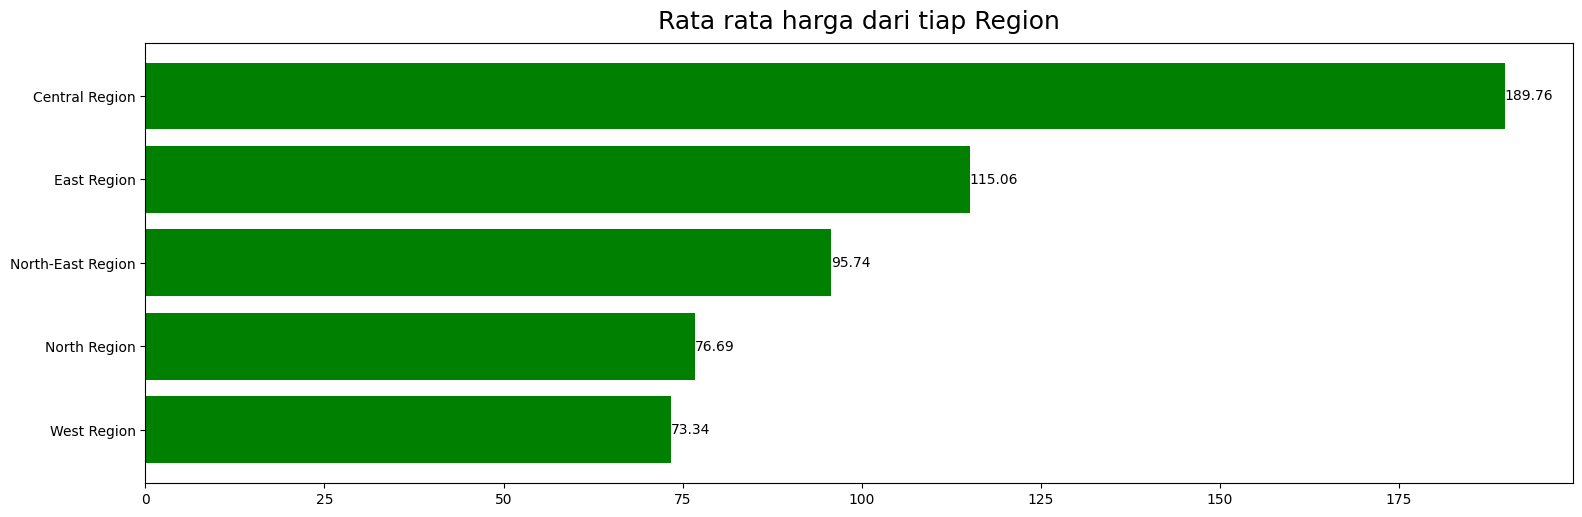

In [ ]:
## menampilkan rata - rata harga by region
avg_by_region = cekngh_group.sort_values(by=['price'])
data = avg_by_region['price']
index = avg_by_region.index

fig, axes = plt.subplots(figsize=(15,5))
fig.tight_layout()

bars = plt.barh(index, data, color="green")
plt.title("Rata rata harga dari tiap Region", fontsize=18, pad=10, color="k")

# Menambahkan nilai/label di sebelah bar horizontal
for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [ ]:
## cek aktivitas penyewaan neighbourhood_group as region
acvtngh_group = join3_table.groupby('neighbourhood_group')['listing_id'].count()
acvtngh_group = pd.DataFrame(acvtngh_group)
acvtngh_group

,listing_id
neighbourhood_group,
Central Region,17887
East Region,2019
North Region,22874
North-East Region,1028
West Region,5204


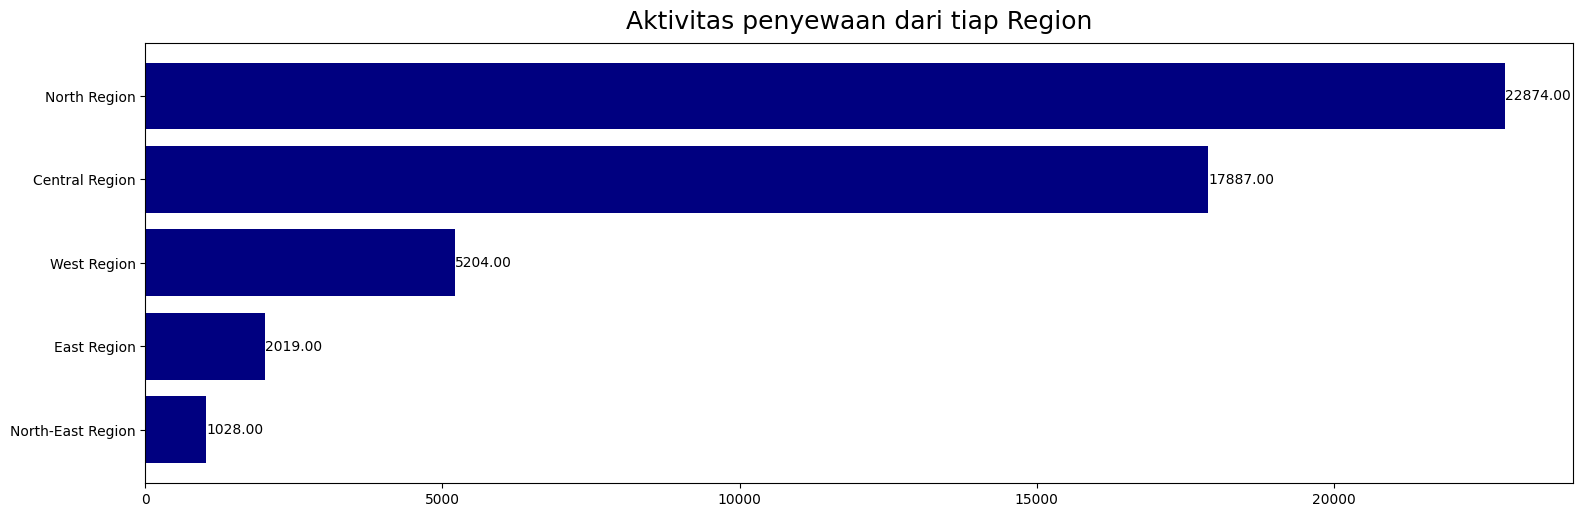

In [ ]:
## menampilkan aktivitas penyewaan by region
acvtngh_group = acvtngh_group.sort_values(by=['listing_id'])
data = acvtngh_group['listing_id']
index = acvtngh_group.index

fig, axes = plt.subplots(figsize=(15,5))
fig.tight_layout()

bars = plt.barh(index, data, color="navy")
plt.title("Aktivitas penyewaan dari tiap Region", fontsize=18, pad=10, color="k")

# Menambahkan nilai/label di sebelah bar horizontal
for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [ ]:
## menampilkan neighbourhood tiap region berdasarkan rata rata harga
## central region
filtered_cr = join3_table[join3_table['neighbourhood_group']== 'Central Region']
ngh_cr = filtered_cr.groupby('neighbourhood')['price'].mean().reset_index()
result_cr = ngh_cr.sort_values('price', ascending = False)

## east region
filtered_er = join3_table[join3_table['neighbourhood_group']== 'East Region']
ngh_er = filtered_er.groupby('neighbourhood')['price'].mean().reset_index()
result_er = ngh_er.sort_values('price', ascending = False)

## north region
filtered_nr = join3_table[join3_table['neighbourhood_group']== 'North Region']
ngh_nr = filtered_nr.groupby('neighbourhood')['price'].mean().reset_index()
result_nr = ngh_nr.sort_values('price', ascending = False)

## west region
filtered_wr = join3_table[join3_table['neighbourhood_group']== 'West Region']
ngh_wr = filtered_wr.groupby('neighbourhood')['price'].mean().reset_index()
result_wr = ngh_wr.sort_values('price', ascending = False)

## north-east region
filtered_ner = join3_table[join3_table['neighbourhood_group']== 'North-East Region']
ngh_ner = filtered_ner.groupby('neighbourhood')['price'].mean().reset_index()
result_ner = ngh_ner.sort_values('price', ascending = False)

## region
region = ['Central', 'East', 'North', 'West', 'North-East']

In [ ]:
import seaborn as sns

In [ ]:
## buat function untuk menampilkan visualisasi bar horizontal
def bar_horizontal(target, region):
  hasil = target.sort_values(by = ['price'])
  data = hasil['price']
  index = hasil['neighbourhood']

  fig, axes = plt.subplots(figsize=(15,5))
  fig.tight_layout()

  bars = plt.barh(index, data, color = "green")
  plt.title(f"Rata rata harga di {region} Region")

  # Menambahkan nilai/label di sebelah bar horizontal
  for bar in bars:
      width = bar.get_width()
      label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
      plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

  plt.show()

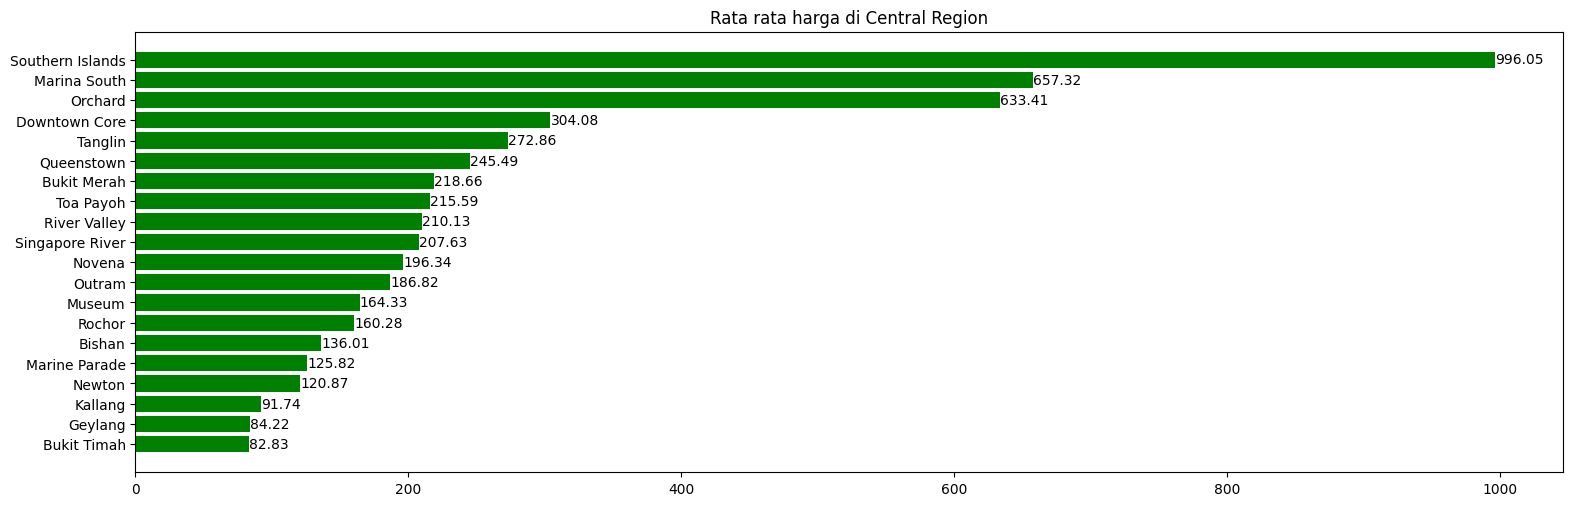

In [ ]:
bar_horizontal(result_cr, region[0])
result_cr = pd.DataFrame(result_cr)

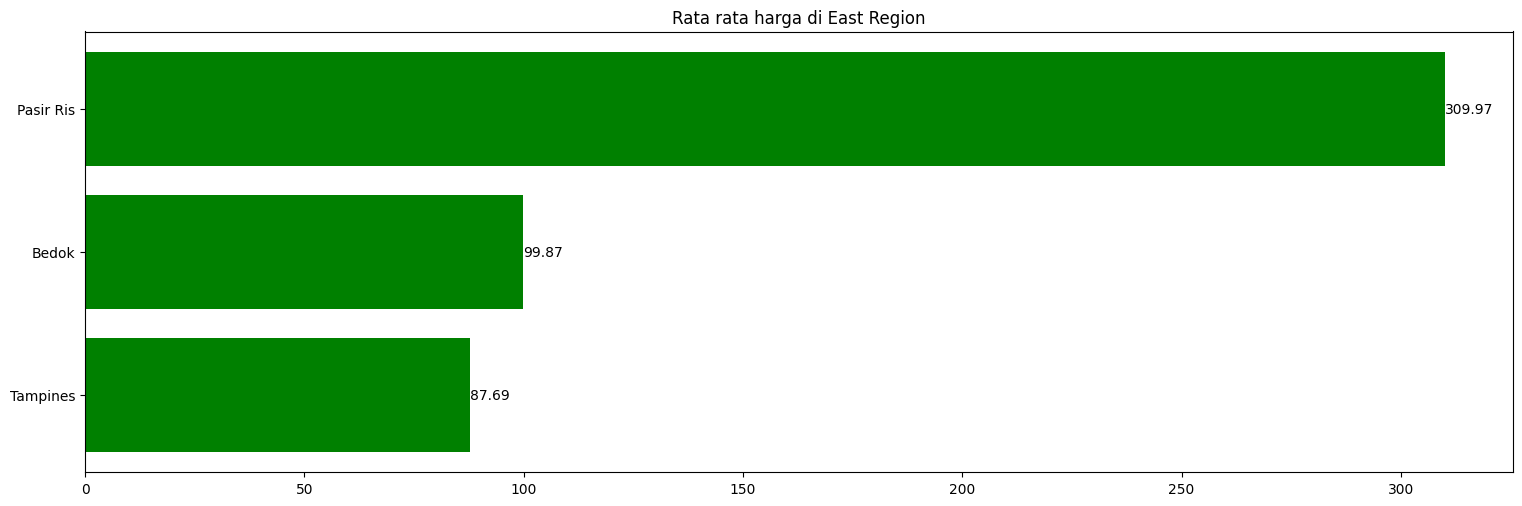

In [ ]:
bar_horizontal(result_er, region[1])
result_er = pd.DataFrame(result_er)

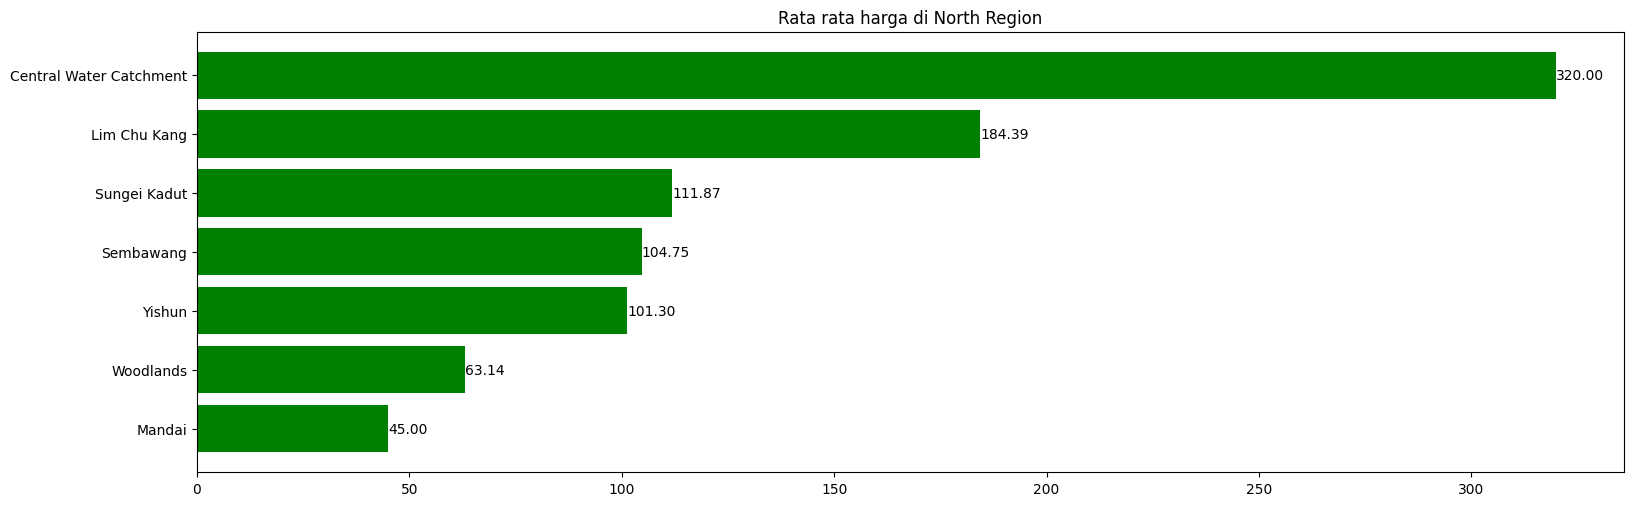

In [ ]:
bar_horizontal(result_nr, region[2])
result_nr = pd.DataFrame(result_nr)

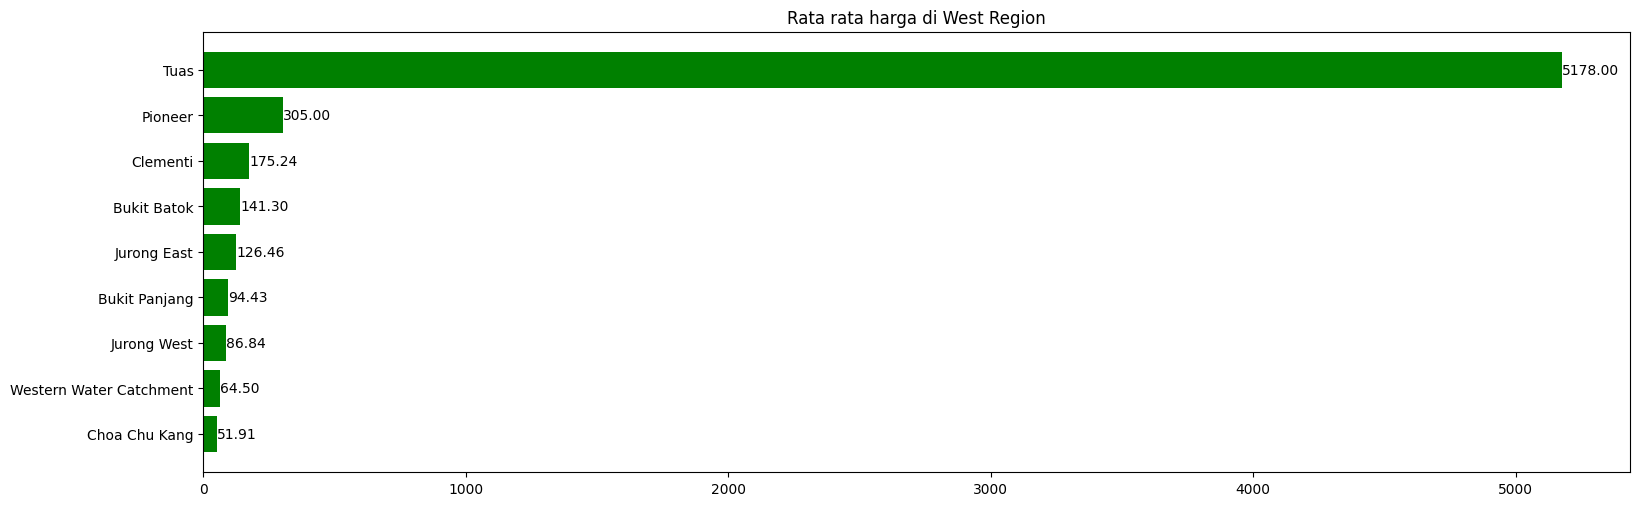

In [ ]:
bar_horizontal(result_wr, region[3])
result_wr = pd.DataFrame(result_wr)

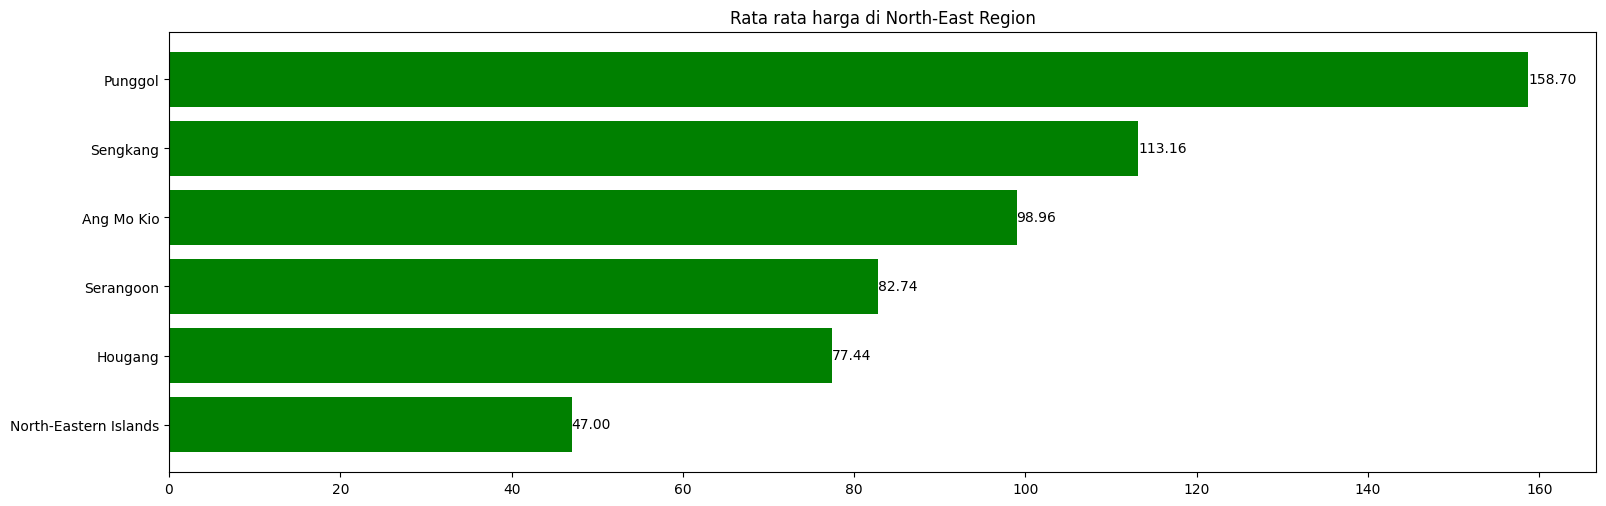

In [ ]:
bar_horizontal(result_ner, region[4])
result_ner = pd.DataFrame(result_ner)

In [ ]:
## cek berapa banyak tipe kamar yang ada di airbnb singapura
## tipekamar = listing.groupby('room_type').size().reset_index(name='count')
## tipekamar = pd.DataFrame(tipekamar)
## tipekamar

tipekamar2 = join3_table.groupby('room_type').size().reset_index(name='total')
tipekamar2 = pd.DataFrame(tipekamar2)
tipekamar2

,room_type,total
0,Entire home/apt,34423
1,Hotel room,1943
2,Private room,13541
3,Shared room,779


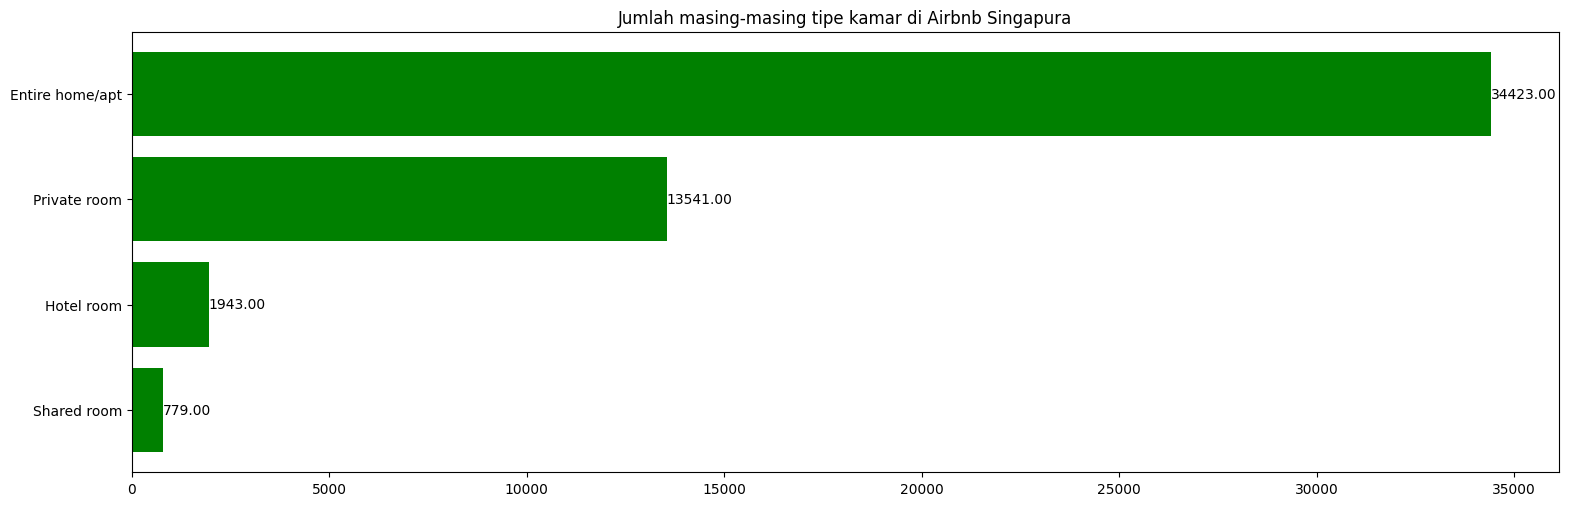

In [ ]:
## visualisasi banyak tipe kamar yang ada di airbnb singapura
hasil = tipekamar2.sort_values(by = ['total'])
data1 = hasil['total']
index1 = hasil['room_type']

fig, axes = plt.subplots(figsize=(15,5))
fig.tight_layout()

bars = plt.barh(index1, data1, color = "green")
plt.title("Jumlah masing-masing tipe kamar di Airbnb Singapura")
# Menambahkan nilai/label di sebelah bar horizontal
for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

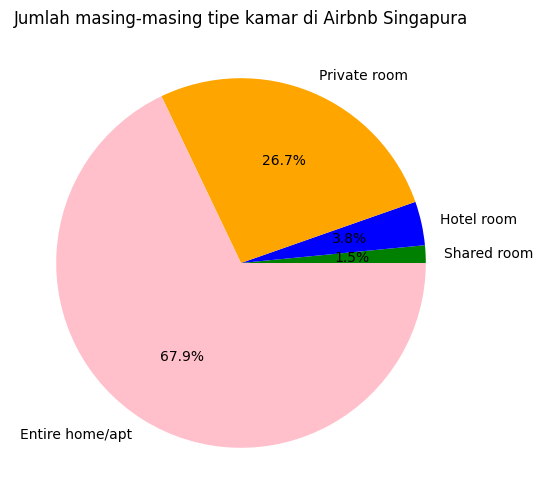

In [ ]:
fig, axes = plt.subplots(figsize=(6, 6))
plt.pie(data1, labels=index1, colors=["green", "blue", "orange", "pink"], autopct='%1.1f%%')
plt.title("Jumlah masing-masing tipe kamar di Airbnb Singapura", loc="center")

plt.show()

In [ ]:
## menampilkan harga rata rata tipe kamar berdasarkan region
kamar_region = join3_table.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
kamar_region = pd.DataFrame(kamar_region)
kamar_region

,neighbourhood_group,room_type,price
0,Central Region,Entire home/apt,252.425468
1,Central Region,Hotel room,134.367995
2,Central Region,Private room,161.466392
3,Central Region,Shared room,58.682181
4,East Region,Entire home/apt,222.904673
5,East Region,Private room,77.501931
6,East Region,Shared room,282.250000
7,North Region,Entire home/apt,78.653494
8,North Region,Hotel room,41.810089
9,North Region,Private room,47.372340


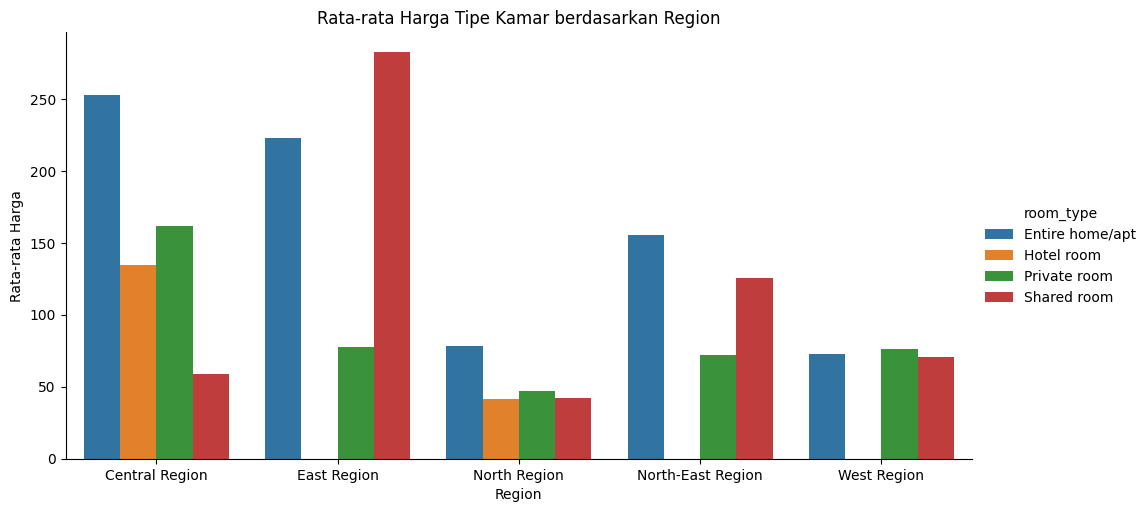

In [ ]:
## menampilkan visualisasi group bar chart harga rata-rata tipe kamar berdasarkan region
sns.catplot(data=kamar_region, x='neighbourhood_group', y='price', hue='room_type', kind='bar', height=5, aspect=2)
plt.title('Rata-rata Harga Tipe Kamar berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Rata-rata Harga')
plt.show()

In [ ]:
review['date'] = pd.to_datetime(review['date'])

In [ ]:
## trend pertahun berdasarkan banyaknya properti disewakan
cektrend_pertahun = review.groupby(review['date'].dt.year)['listing_id'].count().reset_index()
cektrend_pertahun = pd.DataFrame(cektrend_pertahun)
cektrend_pertahun

,date,listing_id
0,2018,7481
1,2019,14114
2,2020,7377
3,2021,6541
4,2022,13499


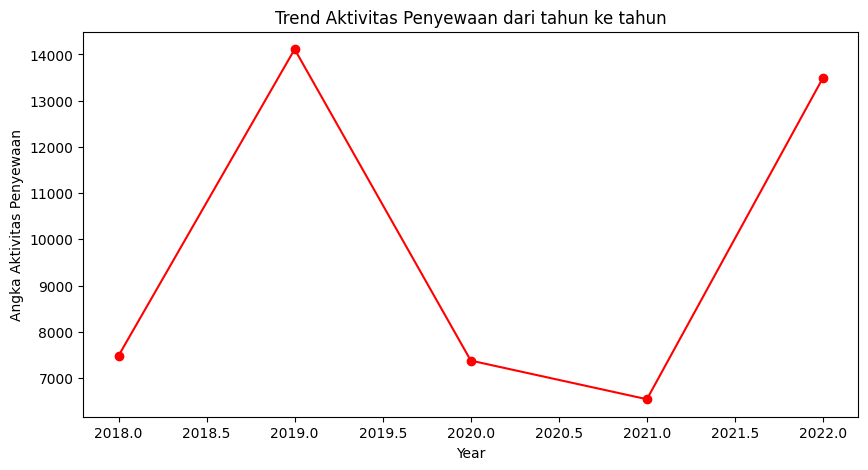

In [ ]:
## visualisasi plot chart untuk trend aktivitas penyewaan
plt.figure(figsize=(10, 5))
plt.plot(cektrend_pertahun['date'], cektrend_pertahun['listing_id'], marker='o', color='red')

plt.xlabel('Year')
plt.ylabel('Angka Aktivitas Penyewaan')
plt.title('Trend Aktivitas Penyewaan dari tahun ke tahun')

plt.show()

In [ ]:
review['date'] = pd.to_datetime(review['date'])
cektrend_tahunbulan = review.groupby(pd.to_datetime(review['date']).dt.strftime('%Y-%m'))['listing_id'].count()
cektrend_tahunbulan = pd.DataFrame(cektrend_tahunbulan)
cektrend_tahunbulan

,listing_id
date,
2018-01,446
2018-02,431
2018-03,507
2018-04,527
2018-05,547
2018-06,603
2018-07,704
2018-08,698
2018-09,726


In [ ]:
## menampilkan trend penyewaan tertinggi dari 2018-01 sampai 2022-09
## print(cektrend_tahunbulan[cektrend_tahunbulan['listing_id']==cektrend_tahunbulan['listing_id'].max()])
print("Trend penyewaan tertinggi dari 2018-01 sampai 2022-09: ")
maxcektrend_tahunbulan = cektrend_tahunbulan[cektrend_tahunbulan['listing_id']==cektrend_tahunbulan['listing_id'].max()]
maxcektrend_tahunbulan = pd.DataFrame(maxcektrend_tahunbulan)
maxcektrend_tahunbulan

Trend penyewaan tertinggi dari 2018-01 sampai 2022-09: 


,listing_id
date,
2022-08,2284


In [ ]:
## menampilkan trend penyewaan terendah dari 2018-01 sampai 2022-09
## print(cektrend_tahunbulan[cektrend_tahunbulan['listing_id']==cektrend_tahunbulan['listing_id'].min()])
print("Trend penyewaan terendah dari 2018-01 sampai 2022-09: ")
mincektrend_tahunbulan = cektrend_tahunbulan[cektrend_tahunbulan['listing_id']==cektrend_tahunbulan['listing_id'].min()]
mincektrend_tahunbulan = pd.DataFrame(mincektrend_tahunbulan)
mincektrend_tahunbulan

Trend penyewaan terendah dari 2018-01 sampai 2022-09: 


,listing_id
date,
2020-04,172


Trend penyewaan airbnb di Singapura paling tinggi ada di tahun 2022-08 dikarenakan alasan pertama, pada tanggal 9 Agustus adalah Hari Kemerdekaan Singapura. kedua, warga Singapura melepas penat dari selesainya pandemi covid-19 dengan keluar rumah/liburan keluar kota dan menyewa properti.

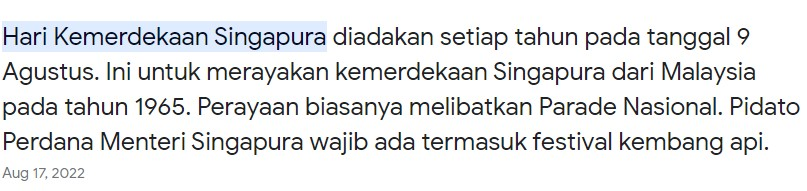

In [ ]:
import datetime as dt

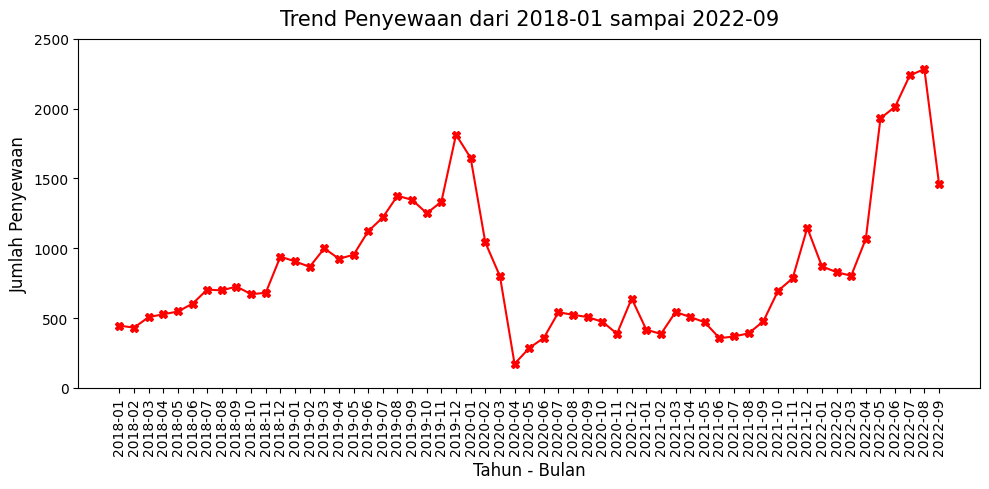

In [ ]:
plt.plot(cektrend_tahunbulan, marker = "X", color="red")
plt.title("Trend Penyewaan dari 2018-01 sampai 2022-09", loc="center", pad=10, fontsize=15, color="k")
plt.xlabel("Tahun - Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
labels, locations = plt.yticks()
plt.yticks(labels)
plt.xticks(rotation=90)

# Penyesuaian kanvas dengan gcf dengan menjadi 10, 5
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [ ]:
## menampilkan trend berdasarkan total properti yang disewakan
cekproperty = join3_table.groupby(['listing_id', 'name', 'room_type', 'neighbourhood', 'neighbourhood_group'])['date'].count().reset_index()
cekproperty = cekproperty.rename(columns={'date': 'aktivitas_penyewaan'})
cekproperty = pd.DataFrame(cekproperty)
## cek property dan room type dengan berdasarkan penyewaan paling banyak
descending_property = cekproperty.sort_values('aktivitas_penyewaan', ascending = False)
descending_property = pd.DataFrame(descending_property)

In [ ]:
descending_property.head()

,listing_id,name,room_type,neighbourhood,neighbourhood_group,aktivitas_penyewaan
679,25360027.0,【JB City SUASANA】byⒽⓈ Breeze Cozy Getaway (^_^)/,Entire home/apt,Woodlands,North Region,413
735,27292304.0,SS【Havona Suite】🏬〖Komtar JBCC🛍️🛒Johor Bahru〗❤️,Entire home/apt,Woodlands,North Region,352
659,24834130.0,NEW! Stylish & Luxury Modern HomeStay with WIFI,Entire home/apt,Woodlands,North Region,334
719,26672993.0,【TCH10】NETFLIX KingBed WiFi BigWorkspace Sanit...,Entire home/apt,Woodlands,North Region,291
739,27419905.0,【TCH9】FREE NETFLIX Parking King Bed WiFi Sanit...,Entire home/apt,Woodlands,North Region,287


In [ ]:
cek_rt = leftjoin_listing_review.groupby(['room_type'])['listing_id'].count().reset_index()
cek_rt = cek_rt.rename(columns={'listing_id': 'aktivitas_penyewaan'})
cek_rt = pd.DataFrame(cek_rt)
descending_rt = cek_rt.sort_values('aktivitas_penyewaan', ascending = False)
descending_rt

,room_type,aktivitas_penyewaan
0,Entire home/apt,33499
2,Private room,12853
1,Hotel room,1931
3,Shared room,729


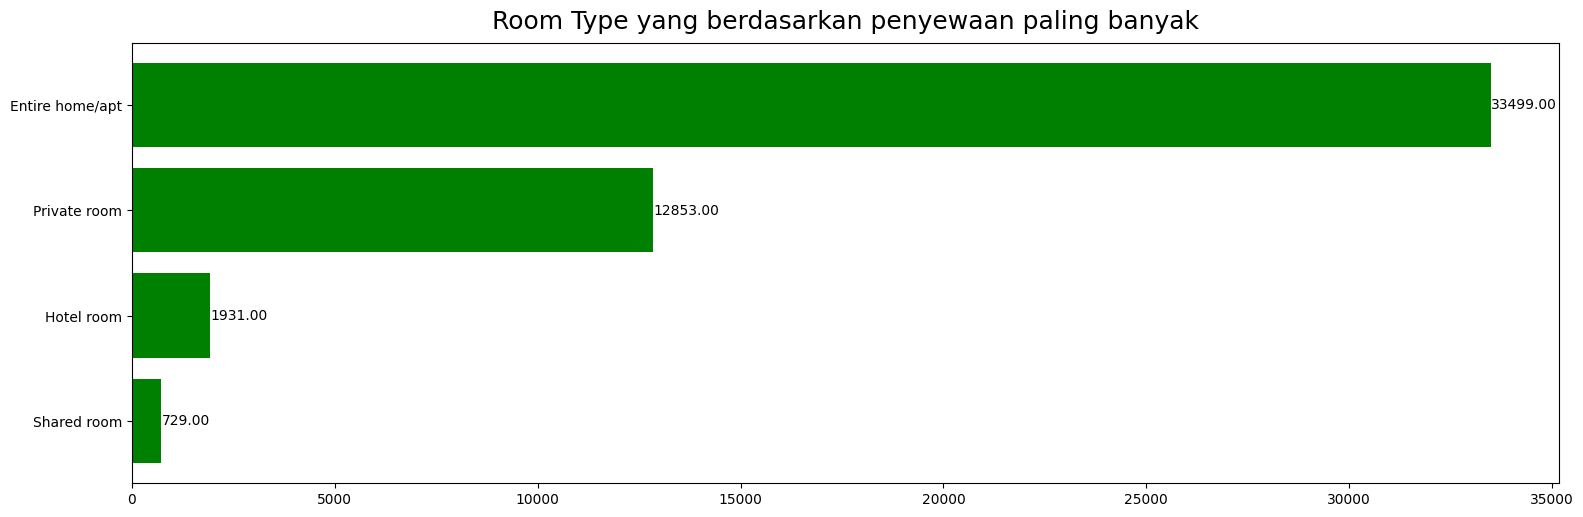

In [ ]:
## visualisasi room_type yang berdasarkan penyewaan paling banyak
rt = cek_rt.sort_values(by=['aktivitas_penyewaan'])
data = rt['aktivitas_penyewaan']
index = rt['room_type']

fig, axes = plt.subplots(figsize=(15,5))
fig.tight_layout()

bars = plt.barh(index, data, color="green")
plt.title("Room Type yang berdasarkan penyewaan paling banyak", fontsize=18, pad=10, color="k")

# Menambahkan nilai/label di sebelah bar horizontal
for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [ ]:
## cek aktivitas penyewaan roomtype berdasarkan region
roomtype_region = join3_table.groupby(['neighbourhood_group', 'room_type'])['listing_id'].count().reset_index()
roomtype_region = pd.DataFrame(roomtype_region)
roomtype_region

,neighbourhood_group,room_type,listing_id
0,Central Region,Entire home/apt,6573
1,Central Region,Hotel room,1594
2,Central Region,Private room,9009
3,Central Region,Shared room,711
4,East Region,Entire home/apt,520
5,East Region,Private room,1499
6,East Region,Shared room,0
7,North Region,Entire home/apt,21563
8,North Region,Hotel room,337
9,North Region,Private room,962


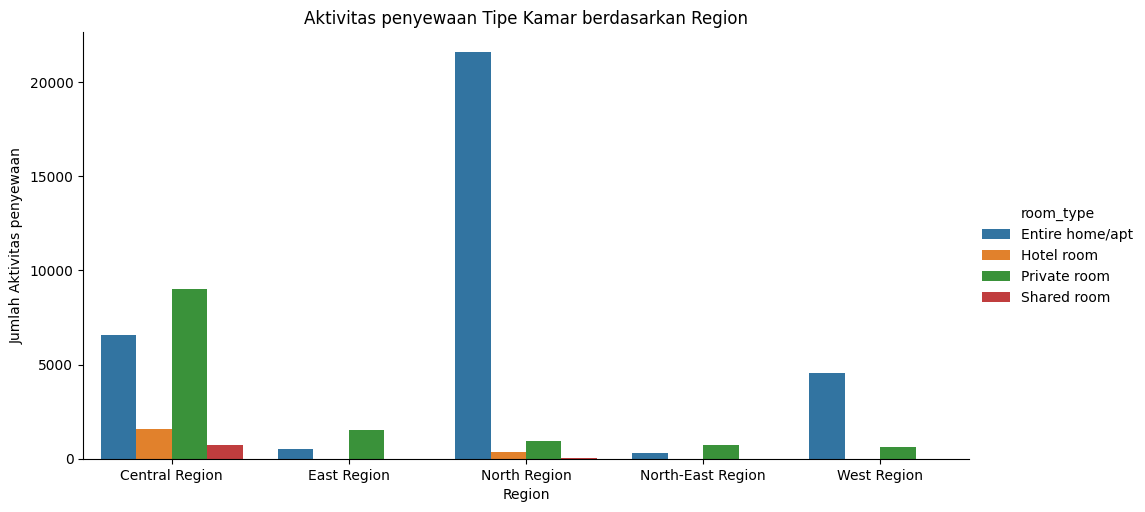

In [ ]:
## menampilkan visualisasi group bar chart aktivitas penyewaan tipe kamar berdasarkan region
sns.catplot(data=roomtype_region, x='neighbourhood_group', y='listing_id', hue='room_type', kind='bar', height=5, aspect=2)
plt.title('Aktivitas penyewaan Tipe Kamar berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Jumlah Aktivitas penyewaan')
plt.show()

In [ ]:
## cek trend neighbourhoon berdasarkan aktivitas penyewaan
cek_nghtrend = join3_table.groupby(['neighbourhood'])['listing_id'].count()
cek_nghtrend = pd.DataFrame(cek_nghtrend)
cek_nghtrend

,listing_id
neighbourhood,
Ang Mo Kio,9
Bedok,1091
Bishan,91
Bukit Batok,19
Bukit Merah,1248
Bukit Panjang,12
Bukit Timah,239
Central Water Catchment,4
Choa Chu Kang,85


In [ ]:
## cek aktivitas penyewaan tertinggi dan terendah tiap neighbourhood
# print("Neighbourhood dengan Aktivitas Penyewaan tertinggi: ","\n", cek_nghtrend[cek_nghtrend['listing_id']==max(cek_nghtrend['listing_id'])])
print("Neighbourhood dengan Aktivitas Penyewaan tertinggi: ")
maxcek_nghtrend = cek_nghtrend[cek_nghtrend['listing_id']==max(cek_nghtrend['listing_id'])]
maxcek_nghtrend = pd.DataFrame(maxcek_nghtrend)
maxcek_nghtrend

Neighbourhood dengan Aktivitas Penyewaan tertinggi: 


,listing_id
neighbourhood,
Woodlands,20055


In [ ]:
##print("Neighbourhood dengan Aktivitas Penyewaan terendah: ","\n", cek_nghtrend[cek_nghtrend['listing_id']==min(cek_nghtrend['listing_id'])])
print("Neighbourhood dengan Aktivitas Penyewaan terendah: ")
mincek_nghtrend = cek_nghtrend[cek_nghtrend['listing_id']==min(cek_nghtrend['listing_id'])]
mincek_nghtrend = pd.DataFrame(mincek_nghtrend)
mincek_nghtrend

Neighbourhood dengan Aktivitas Penyewaan terendah: 


,listing_id
neighbourhood,
Mandai,0
Pioneer,0
Tuas,0


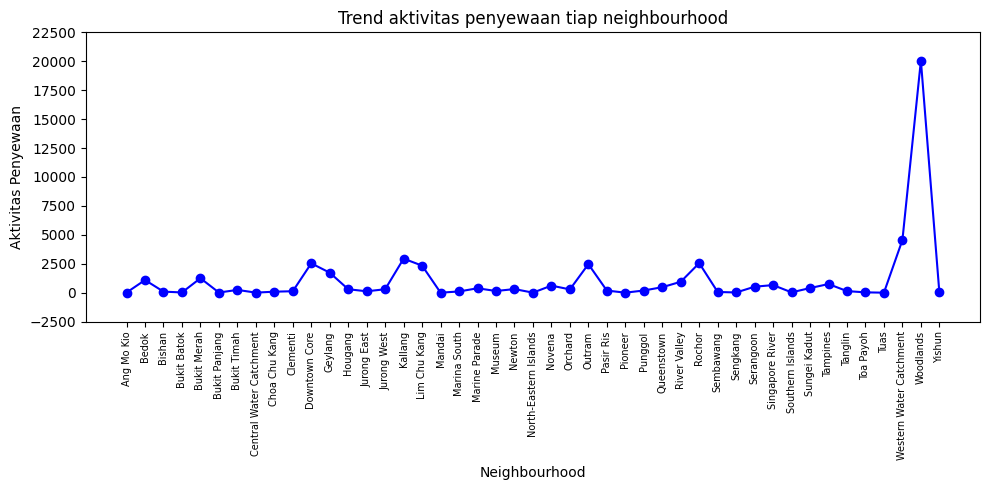

In [ ]:
## menampilkan visualisasi grafik untuk neighbourhood
plt.plot(cek_nghtrend, marker = "o", color = "blue")
plt.title("Trend aktivitas penyewaan tiap neighbourhood", loc="center", fontsize=12, color = "black")
plt.xlabel("Neighbourhood")
plt.ylabel("Aktivitas Penyewaan")
labels, locations = plt.yticks()
plt.yticks(labels)
plt.xticks(rotation = 90, fontsize=7)

#penyesuaian kanvas
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

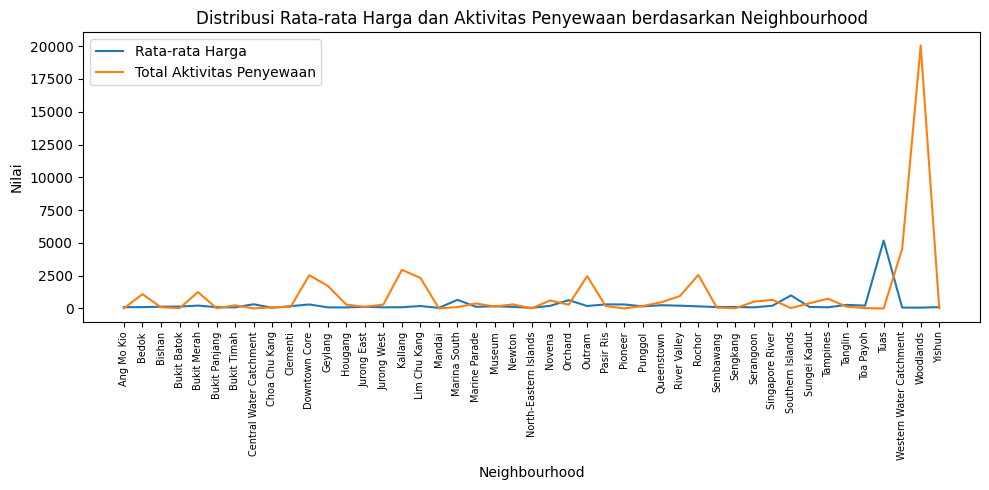

In [ ]:
## menggabungkan kedua DataFrame berdasarkan kolom "neighbourhood"
gabungan = pd.merge(cekngh, cek_nghtrend, on='neighbourhood')

## mengatur label sumbu x
x = gabungan.index

## mengatur data untuk sumbu y
y1 = gabungan['price']
y2 = gabungan['listing_id']

## membuat plot
plt.plot(x, y1, label='Rata-rata Harga')
plt.plot(x, y2, label='Total Aktivitas Penyewaan')

## menambahkan judul dan label sumbu
plt.title('Distribusi Rata-rata Harga dan Aktivitas Penyewaan berdasarkan Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Nilai')
plt.xticks(rotation = 90, fontsize = 7)

## menambahkan legenda
plt.legend()

## menampilkan plot
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [ ]:
## menampilkan neighbourhood tiap region berdasarkan rata rata harga
## central region
filter_cr = join3_table[join3_table['neighbourhood_group']== 'Central Region']
acvt_cr = filter_cr.groupby('neighbourhood')['listing_id'].count().reset_index()
hasil_cr = acvt_cr.sort_values('listing_id', ascending = False)

## east region
filter_er = join3_table[join3_table['neighbourhood_group']== 'East Region']
acvt_er = filter_er.groupby('neighbourhood')['listing_id'].count().reset_index()
hasil_er = acvt_er.sort_values('listing_id', ascending = False)

## north region
filter_nr = join3_table[join3_table['neighbourhood_group']== 'North Region']
acvt_nr = filter_nr.groupby('neighbourhood')['listing_id'].count().reset_index()
hasil_nr = acvt_nr.sort_values('listing_id', ascending = False)

## west region
filter_wr = join3_table[join3_table['neighbourhood_group']== 'West Region']
acvt_wr = filter_wr.groupby('neighbourhood')['listing_id'].count().reset_index()
hasil_wr = acvt_wr.sort_values('listing_id', ascending = False)

## north-east region
filter_ner = join3_table[join3_table['neighbourhood_group']== 'North-East Region']
acvt_ner = filter_ner.groupby('neighbourhood')['listing_id'].count().reset_index()
hasil_ner = acvt_ner.sort_values('listing_id', ascending = False)

## region
region1 = ['Central', 'East', 'North', 'West', 'North-East']

In [ ]:
## buat function untuk menampilkan visualisasi bar horizontal
def bar_h_listingid(target, region):
  hasil = target.sort_values(by = ['listing_id'])
  data = hasil['listing_id']
  index = hasil['neighbourhood']

  fig, axes = plt.subplots(figsize=(15,5))
  fig.tight_layout()

  bars = plt.barh(index, data, color = "navy")
  plt.title(f"aktivitas penyewaan di {region} Region")
  plt.xlabel('Angka Aktivitas Penyewaan')

  # Menambahkan nilai/label di sebelah bar horizontal
  for bar in bars:
      width = bar.get_width()
      label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
      plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

  plt.show()

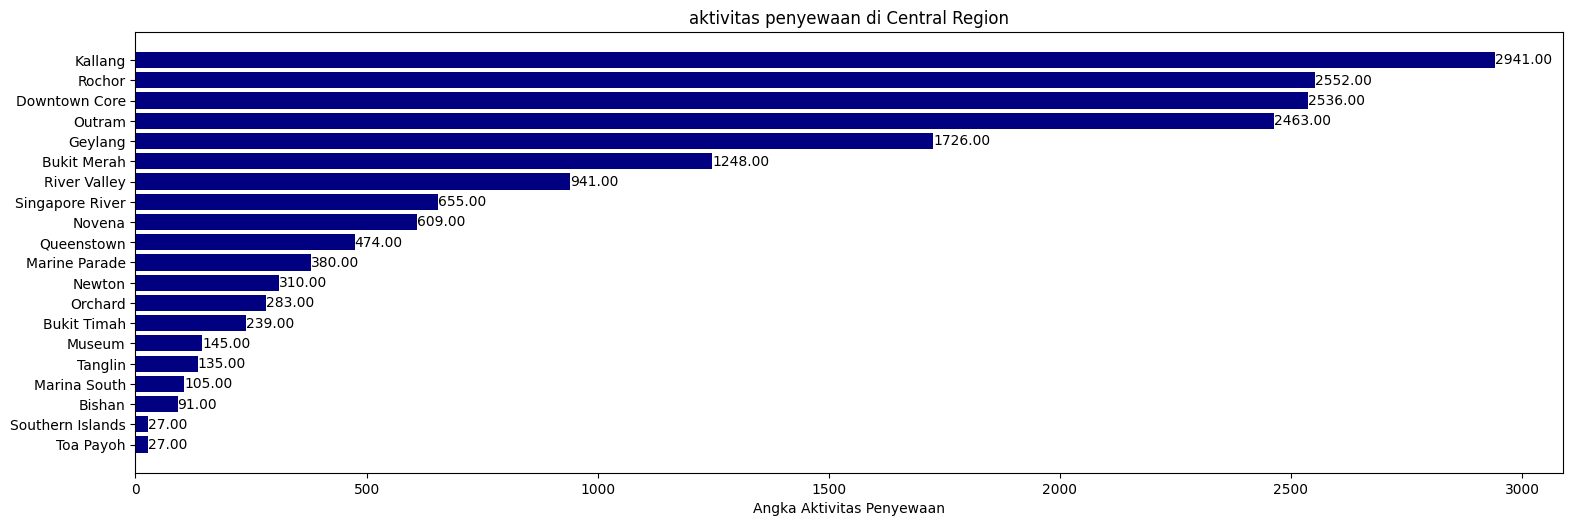

In [ ]:
bar_h_listingid(hasil_cr, region[0])

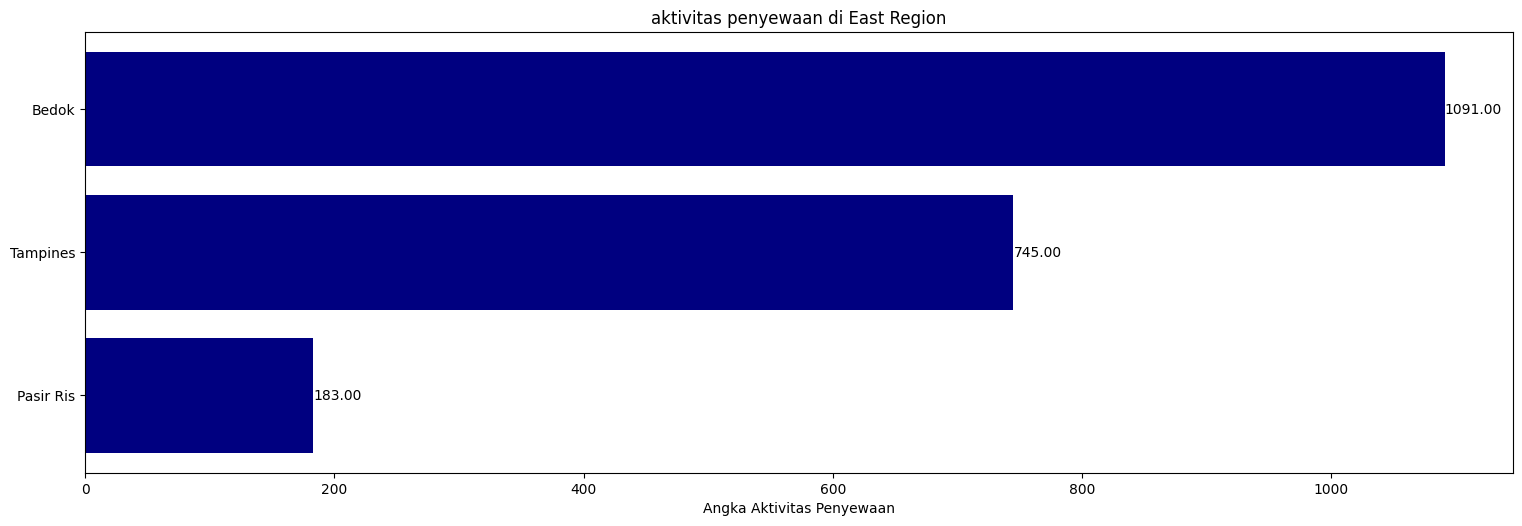

In [ ]:
bar_h_listingid(hasil_er, region[1])

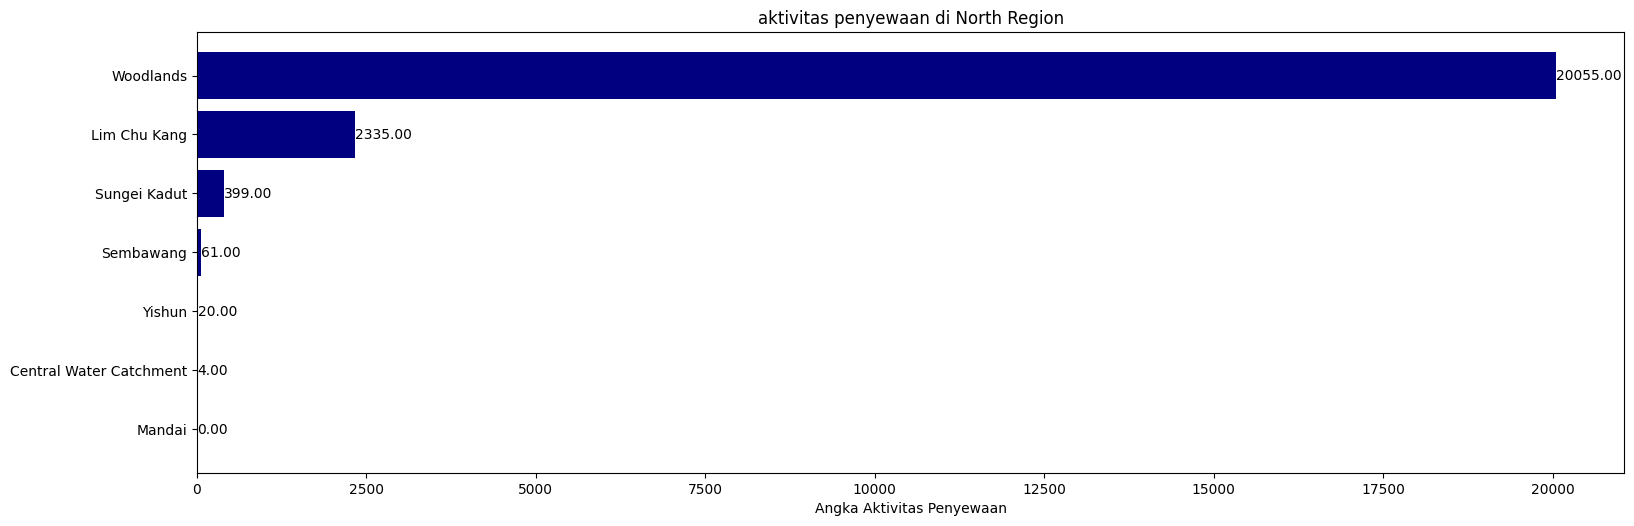

In [ ]:
bar_h_listingid(hasil_nr, region[2])

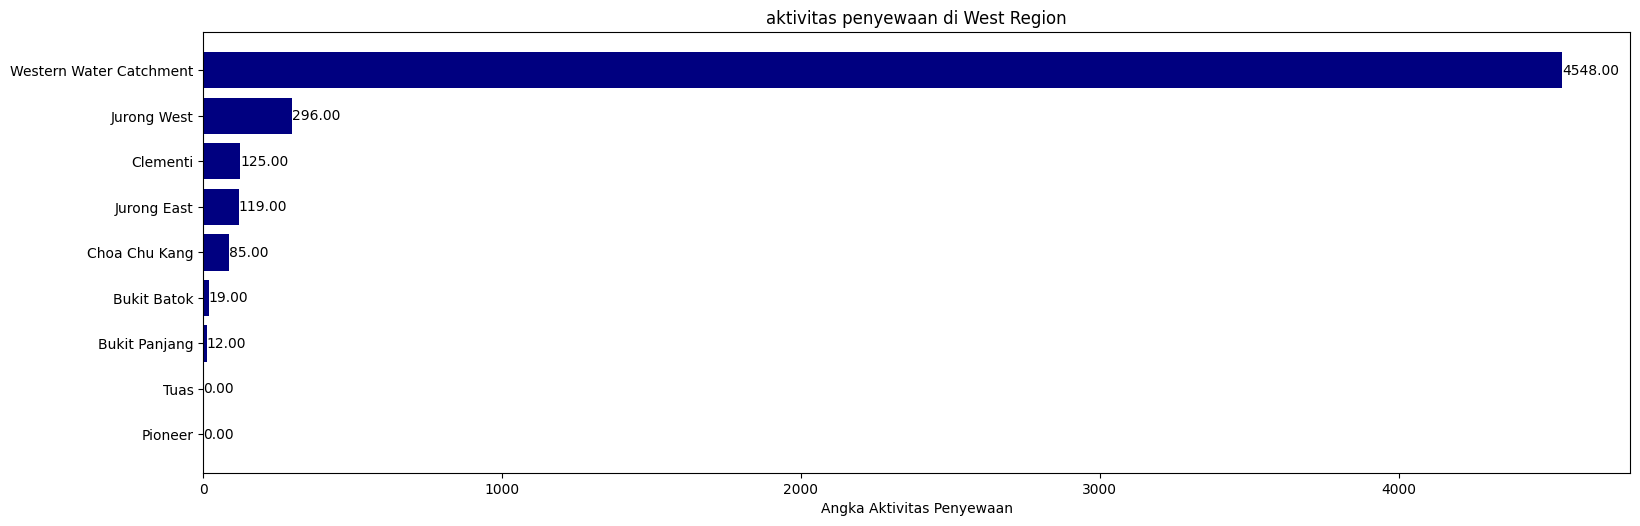

In [ ]:
bar_h_listingid(hasil_wr, region[3])

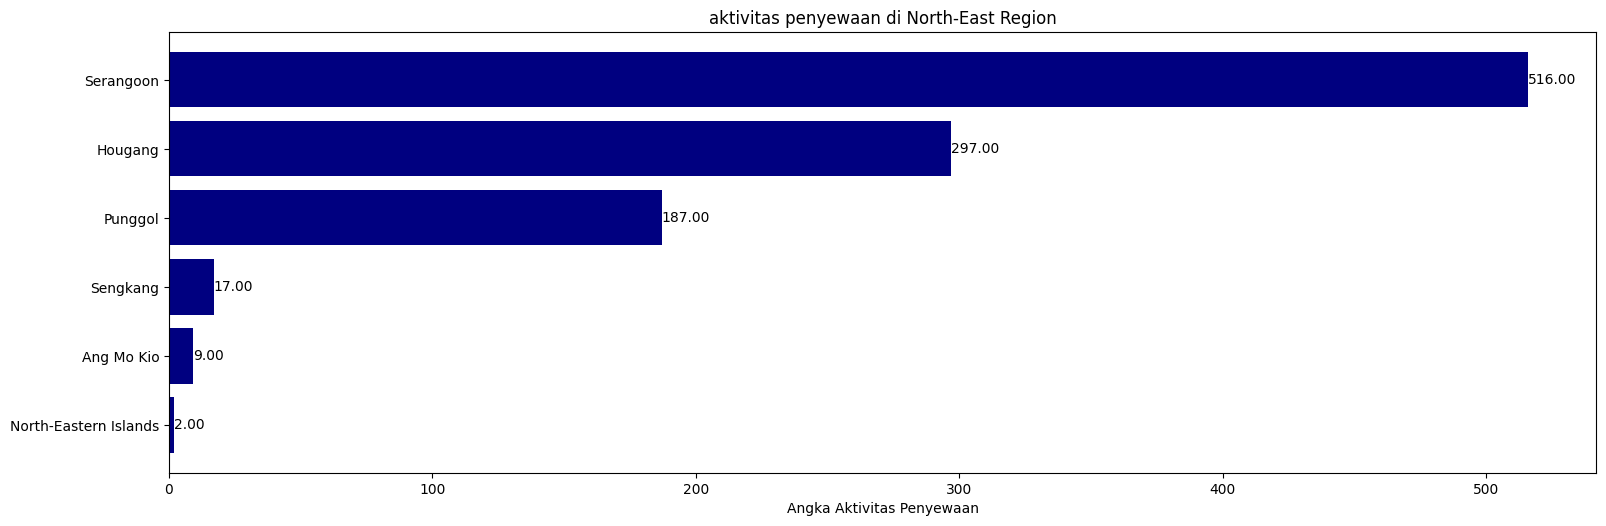

In [ ]:
bar_h_listingid(hasil_ner, region[4])

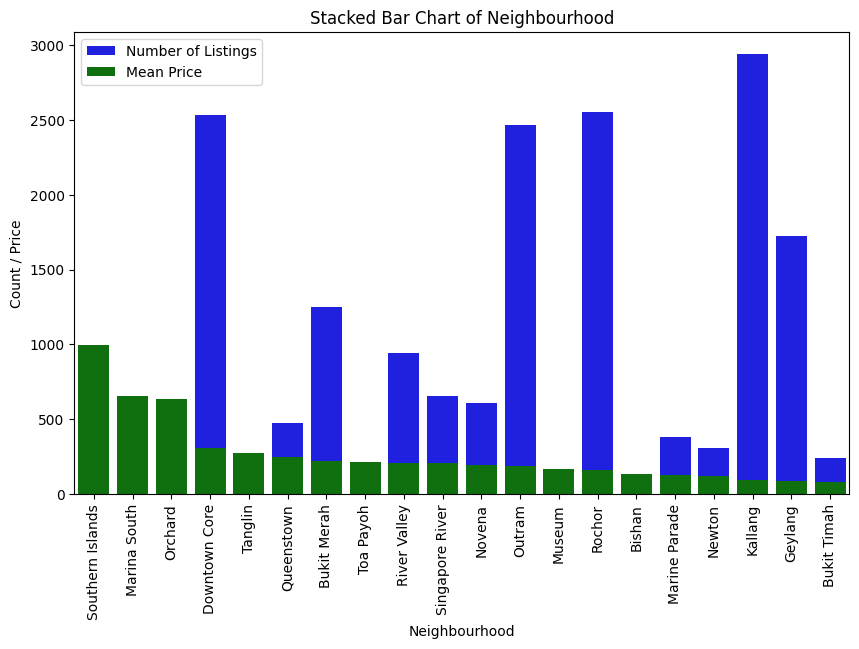

In [ ]:
# Menggabungkan hasil aggregasi harga dan jumlah listing
merged_data = pd.merge(result_cr, hasil_cr, on='neighbourhood', suffixes=('_price', '_listings'))

# Membuat stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='listing_id', data=merged_data, color='blue', label='Number of Listings')
sns.barplot(x='neighbourhood', y='price', data=merged_data, color='green', label='Mean Price')

plt.xlabel('Neighbourhood')
plt.ylabel('Count / Price')
plt.title('Stacked Bar Chart of Neighbourhood')

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
kallang = join3_table.groupby(['name', 'host_name', 'neighbourhood', 'room_type', 'price'])['listing_id'].count().reset_index()
kallang = kallang.rename(columns={'listing_id': 'aktivitas_penyewaan'})
filtered_kallang = kallang[kallang['neighbourhood'] == 'Kallang']
desc_kallang = filtered_kallang.sort_values('aktivitas_penyewaan', ascending = False)
hasil_kallang = pd.DataFrame(desc_kallang)
hasil_kallang.head()

,name,host_name,neighbourhood,room_type,price,aktivitas_penyewaan
1656,"Great location. A spacious, well equipped home.",Angelina,Kallang,Entire home/apt,137,184
545,"Apt Room 5mins to Haji, near MBS/Suntec/Sportshub",Sk,Kallang,Private room,80,169
954,"City 1-Pax Private Room, Shared Toilet",Peggy,Kallang,Private room,67,142
953,"City 1-Pax Private Room, Shared Toilet",Peggy,Kallang,Private room,62,136
36,(3 mins to MRT) Single Capsule + All Day Break...,D,Kallang,Hotel room,66,101


In [ ]:
rochor = join3_table.groupby(['name', 'host_name', 'neighbourhood', 'room_type', 'price'])['listing_id'].count().reset_index()
rochor = rochor.rename(columns={'listing_id': 'aktivitas_penyewaan'})
filtered_rochor = rochor[rochor['neighbourhood'] == 'Rochor']
desc_rochor = filtered_rochor.sort_values('aktivitas_penyewaan', ascending = False)
hasil_rochor = pd.DataFrame(desc_rochor)
hasil_rochor.head()

,name,host_name,neighbourhood,room_type,price,aktivitas_penyewaan
988,"City room 5mins to Haji, near Suntec/MBS/Merlion",Sk,Rochor,Private room,64,207
2097,Luxury Capsule (Single - Mixed) [Kampong Glam],Cheryl,Rochor,Hotel room,92,170
1286,"D.Modern Place, value for money for 1 or more....",Shan Bros,Rochor,Private room,45,113
3488,"Twin Cabin, shared bathroom near Jalan Besar MRT",Alex,Rochor,Private room,348,96
1367,"Double Room, DAYUSE, 5 hours: 17:00-22:00",Kuan,Rochor,Private room,118,95


In [ ]:
bedok = join3_table.groupby(['name', 'host_name', 'neighbourhood', 'room_type', 'price'])['listing_id'].count().reset_index()
bedok = bedok.rename(columns={'listing_id': 'aktivitas_penyewaan'})
filtered_bedok = bedok[bedok['neighbourhood'] == 'Bedok']
desc_bedok = filtered_bedok.sort_values('aktivitas_penyewaan', ascending = False)
hasil_bedok = pd.DataFrame(desc_bedok)
hasil_bedok.head()

,name,host_name,neighbourhood,room_type,price,aktivitas_penyewaan
2085,Luxuriously Spacious Studio Apt.,Shirley,Bedok,Entire home/apt,139,167
3148,Small Utility Cosy Room,Nargis,Bedok,Private room,36,159
887,Cheap Private Rm in Cosy Home!,Nargis,Bedok,Private room,42,124
3639,eHome-Cozy Apartment (Tanah Merah MRT),Benny,Bedok,Entire home/apt,109,63
18,#Deluxe Sea-Facing Condo ~ Luxury Beach Amenities,Kelly,Bedok,Entire home/apt,190,62


In [ ]:
tampines = join3_table.groupby(['name', 'host_name', 'neighbourhood', 'room_type', 'price'])['listing_id'].count().reset_index()
tampines = tampines.rename(columns={'listing_id': 'aktivitas_penyewaan'})
filtered_tampines = tampines[tampines['neighbourhood'] == 'Tampines']
desc_tampines = filtered_tampines.sort_values('aktivitas_penyewaan', ascending = False)
hasil_tampines = pd.DataFrame(desc_tampines)
hasil_tampines.head()

,name,host_name,neighbourhood,room_type,price,aktivitas_penyewaan
3454,The Private Sanctuary,Eddie,Tampines,Private room,70,126
3450,The Lily Room,Eddie,Tampines,Private room,60,124
3461,The Zen Room,Eddie,Tampines,Private room,45,104
3443,The Antiquity Room,Eddie,Tampines,Private room,80,103
3459,The Studio Suite,Eddie,Tampines,Private room,70,90


In [ ]:
woodlands = join3_table.groupby(['name', 'host_name', 'neighbourhood', 'room_type', 'price'])['listing_id'].count().reset_index()
woodlands = woodlands.rename(columns={'listing_id': 'aktivitas_penyewaan'})
filtered_woodlands = woodlands[woodlands['neighbourhood'] == 'Woodlands']
desc_woodlands = filtered_woodlands.sort_values('aktivitas_penyewaan', ascending = False)
hasil_woodlands = pd.DataFrame(desc_woodlands)
hasil_woodlands.head()

,name,host_name,neighbourhood,room_type,price,aktivitas_penyewaan
3880,【JB City SUASANA】byⒽⓈ Breeze Cozy Getaway (^_^)/,Enrica,Woodlands,Entire home/apt,44,413
2957,SS【Havona Suite】🏬〖Komtar JBCC🛍️🛒Johor Bahru〗❤️,Bryce [RentRadise],Woodlands,Entire home/apt,47,352
2330,NEW! Stylish & Luxury Modern HomeStay with WIFI,Xavier,Woodlands,Entire home/apt,45,334
3918,【TCH10】NETFLIX KingBed WiFi BigWorkspace Sanit...,Kym,Woodlands,Entire home/apt,43,291
3921,【TCH9】FREE NETFLIX Parking King Bed WiFi Sanit...,Terence,Woodlands,Entire home/apt,48,287


In [ ]:
serangoon = join3_table.groupby(['name', 'host_name', 'neighbourhood', 'room_type', 'price'])['listing_id'].count().reset_index()
serangoon = serangoon.rename(columns={'listing_id': 'aktivitas_penyewaan'})
filtered_serangoon = serangoon[serangoon['neighbourhood'] == 'Serangoon']
desc_serangoon = filtered_serangoon.sort_values('aktivitas_penyewaan', ascending = False)
hasil_serangoon = pd.DataFrame(desc_serangoon)
hasil_serangoon.head()

,name,host_name,neighbourhood,room_type,price,aktivitas_penyewaan
669,Big Room @ Seletar Hills\nsize 458sq.ft\n.,Lim,Serangoon,Private room,80,103
2432,Nice Room@ Seletar Hills,Lim,Serangoon,Private room,40,86
736,Bright and Spacious Double Bedroom,Grace,Serangoon,Private room,60,68
473,Affordable stay near Serangoon!,Stteven,Serangoon,Private room,90,44
1914,Large Room@ Seletar\nsize 458sq.ft\n20x22.9sq.ft,Lim,Serangoon,Private room,78,33


In [ ]:
hougang = join3_table.groupby(['name', 'host_name', 'neighbourhood', 'room_type', 'price'])['listing_id'].count().reset_index()
hougang = hougang.rename(columns={'listing_id': 'aktivitas_penyewaan'})
filtered_hougang = hougang[hougang['neighbourhood'] == 'Hougang']
desc_hougang = filtered_hougang.sort_values('aktivitas_penyewaan', ascending = False)
hasil_hougang = pd.DataFrame(desc_hougang)
hasil_hougang.head()

,name,host_name,neighbourhood,room_type,price,aktivitas_penyewaan
302,"3-5mins to Kovan MRT, 20mins to City, Quiet, C...",Freddy,Hougang,Entire home/apt,44,136
427,"A 3-5mins to Kovan MRT, 20mins to City,Quiet,C...",Freddy,Hougang,Private room,44,101
1491,Evergreen park condo near hougang MRT,Shangping,Hougang,Private room,40,31
1273,"Cozy, Many Guests Loved It Here",Regina,Hougang,Private room,50,10
3173,Spacious 3BR Apartment in Northeast Singapore,Randell,Hougang,Entire home/apt,722,4


In [ ]:
wwc = join3_table.groupby(['name', 'host_name', 'neighbourhood', 'room_type', 'price'])['listing_id'].count().reset_index()
wwc = wwc.rename(columns={'listing_id': 'aktivitas_penyewaan'})
filtered_wwc = wwc[wwc['neighbourhood'] == 'Western Water Catchment']
desc_wwc = filtered_wwc.sort_values('aktivitas_penyewaan', ascending = False)
hasil_wwc = pd.DataFrame(desc_wwc)
hasil_wwc.head()

,name,host_name,neighbourhood,room_type,price,aktivitas_penyewaan
1189,Cozy 3 Guests (WIFI) High Floor @ Puteri Harbour,Kc,Western Water Catchment,Entire home/apt,45,181
1897,"LV House @ Puteri Harbour, Bukit Indah, JB 1ROOM",Louis,Western Water Catchment,Entire home/apt,28,172
4021,🌟C818Almas suites studio seaview netflix‼️ 🌈STAY,Stay Property Management,Western Water Catchment,Entire home/apt,39,131
495,Almas Puteri Harbour/Nusajaya Suite room,Agnes,Western Water Catchment,Entire home/apt,56,101
489,Almas Black Yellow -Puteri Habour,Michael C,Western Water Catchment,Entire home/apt,46,95
